In [2]:
import zipfile

In [3]:
def unzip_folder(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)


zip_file_path = 'archive (10).zip'
extract_to_path = 'dataset'

unzip_folder(zip_file_path, extract_to_path)

In [3]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from pathlib import Path 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
train_path = 'dataset\\chest_xray\\chest_xray\\train'
test_path = 'dataset\\chest_xray\\chest_xray\\test'
val_path = 'dataset\\chest_xray\\chest_xray\\val'

In [5]:
train_path = Path(train_path)
test_path = Path(test_path)
val_path = Path(val_path)

In [6]:
train_images_path = train_path.glob("*/*")
test_images_path = test_path.glob("*/*")
val_images_path = val_path.glob("*/*")

In [7]:
train_images_path = list(train_images_path)
test_images_path = list(test_images_path)
val_images_path = list(val_images_path)

In [8]:
train_images_path = list(map(lambda x: str(x), train_images_path))
test_images_path = list(map(lambda x: str(x), test_images_path))
val_images_path = list(map(lambda x: str(x), val_images_path))


In [9]:
print(train_images_path[:3])

['dataset\\chest_xray\\chest_xray\\train\\NORMAL\\.DS_Store', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg']


In [10]:
train_images_path = [path for path in train_images_path if ".DS_Store" not in path]

print(train_images_path)

['dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0119-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0122-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0125-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0127-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0128-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0129-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0131-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0133-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0135-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0137-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0140-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0141-0001.jpeg', 'dataset\\chest_xray\\chest_xray\

In [11]:
test_images_path = [path for path in test_images_path if ".DS_Store" not in path]

print(test_images_path)

['dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0007-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0009-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0010-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0011-0001-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0011-0001-0002.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0011-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0013-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0015-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0016-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\tes

In [12]:
print(val_images_path[:3])

['dataset\\chest_xray\\chest_xray\\val\\NORMAL\\.DS_Store', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1427-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1430-0001.jpeg']


In [13]:
val_images_path = [path for path in val_images_path if ".DS_Store" not in path]

print(val_images_path)

['dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1427-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1430-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1431-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1436-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1437-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1438-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1440-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1442-0001.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\PNEUMONIA\\person1946_bacteria_4874.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\PNEUMONIA\\person1946_bacteria_4875.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\PNEUMONIA\\person1947_bacteria_4876.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\PNEUMONIA\\person1949_bacteria_4880.jpeg', 'dataset\\chest_xray\\chest_xray\\val\\PNEUMONIA\\person1950_bacteria_4

In [14]:
train_dataset_length = len(train_images_path)
val_dataset_length = len(val_images_path)
test_dataset_length = len(test_images_path)

print("Number of train image: ", train_dataset_length)
print("Number of validation image: ", val_dataset_length)
print("Number of testing image: ", test_dataset_length)

Number of train image:  5216
Number of validation image:  16
Number of testing image:  624


In [15]:
LABELS = {'NORMAL': 0 , 'PNEUMONIA':1}
INV_LABELS = {0 : 'NORMAL', 1 : 'PNEUMONIA'}

def get_label(path:str) -> int:
  return LABELS[path.split('\\')[-2]]

train_labels = list(map(lambda x: get_label(x), train_images_path))
val_labels = list(map(lambda x: get_label(x), val_images_path))
test_labels = list(map(lambda x: get_label(x), test_images_path))

In [16]:
l = []
m = []
for i in train_labels:
    if(i == 0):
        l.append("Normal")
    else:
        m.append("Pneumonia")
print(len(l))
print(len(m))

1341
3875


In [17]:
BATCH_SIZE = 32

# Function used for Transformation
def load_and_transform(images, train = True):
    image = tf.io.read_file(images)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = image / 255
    image = tf.image.resize(image, [224 , 224], method="nearest")
    return image

In [18]:
train_image = [load_and_transform(i) for i in train_images_path]
train_images = np.asarray(train_image)
train_labels = np.asarray(train_labels)
print(train_images.shape)
print(train_labels.shape)

(5216, 224, 224, 3)
(5216,)


PNEUMONIA


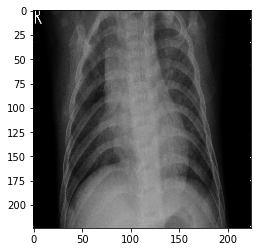

In [19]:
print(INV_LABELS[train_labels[5000]])
plt.imshow(train_images[5000].reshape(224 , 224 , 3))

In [20]:
val_image = [load_and_transform(i) for i in val_images_path]
val_images = np.asarray(val_image)
val_labels = np.asarray(val_labels)
print(val_images.shape)
print(val_labels.shape)

(16, 224, 224, 3)
(16,)


PNEUMONIA


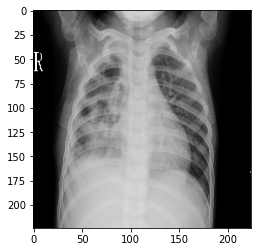

In [21]:
print(INV_LABELS[val_labels[15]])
plt.imshow(val_images[15].reshape(224 , 224 , 3))

In [22]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        width_shift_range=0.1,  
        height_shift_range=0.1)

datagen.fit(train_images)

In [23]:
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model1 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23827201 (90.89 MB)
Trainable params: 23781761 (90.72 MB)
Non-trainable params: 45440 (177.50 KB)
__________

In [44]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [45]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_resnet.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3)

In [46]:
history1 = model1.fit(
    datagen.flow(train_images,train_labels, batch_size = 32),
    steps_per_epoch=train_dataset_length//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop, learning_rate_reduction],
    validation_data = datagen.flow(val_images, val_labels)
)

Epoch 1/8
163/163 [==============================] - ETA: 0s - loss: 0.1526 - accuracy: 0.9427 - precision: 0.9649 - recall: 0.9577
Epoch 1: val_loss improved from inf to 3.07083, saving model to best_weights_resnet.h5
163/163 [==============================] - 1626s 10s/step - loss: 0.1526 - accuracy: 0.9427 - precision: 0.9649 - recall: 0.9577 - val_loss: 3.0708 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/8
163/163 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9603 - precision: 0.9746 - recall: 0.9719
Epoch 2: val_loss did not improve from 3.07083
163/163 [==============================] - 1581s 10s/step - loss: 0.1112 - accuracy: 0.9603 - precision: 0.9746 - recall: 0.9719 - val_loss: 36.6130 - val_accuracy: 0.3125 - val_precision: 0.3846 - val_recall: 0.6250 - lr: 0.0010
Epoch 3/8
163/163 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.9613 - precision: 0.9776 - recall: 0.9701
Epo

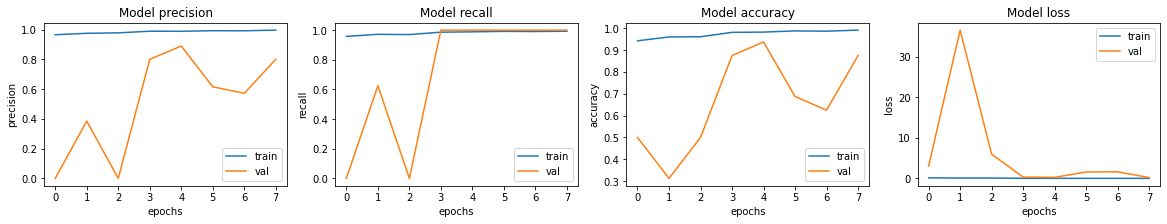

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history1.history[met])
    ax[i].plot(history1.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [24]:
backbone = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False
)

model3 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22065185 (84.17 MB)
Trainable params: 22030753 (84.04 MB)
Non-trainable params: 34432 (134.50 KB)
________

In [26]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [27]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights_inception.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3)

In [28]:
history3 = model3.fit(
    datagen.flow(train_images,train_labels, batch_size = 32),
    steps_per_epoch=train_dataset_length//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop, learning_rate_reduction],
    validation_data = datagen.flow(val_images, val_labels)
)

Epoch 1/8
163/163 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.9663 - precision: 0.9775 - recall: 0.9770
Epoch 1: val_loss improved from inf to 1.51145, saving model to best_weights_inception.h5
163/163 [==============================] - 1310s 8s/step - loss: 0.1009 - accuracy: 0.9663 - precision: 0.9775 - recall: 0.9770 - val_loss: 1.5115 - val_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/8
163/163 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9757 - precision: 0.9857 - recall: 0.9814
Epoch 2: val_loss did not improve from 1.51145
163/163 [==============================] - 1279s 8s/step - loss: 0.0734 - accuracy: 0.9757 - precision: 0.9857 - recall: 0.9814 - val_loss: 35.0491 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/8
163/163 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9783 - precision: 0.9853 - recall: 0.9855
Epoch 3: v

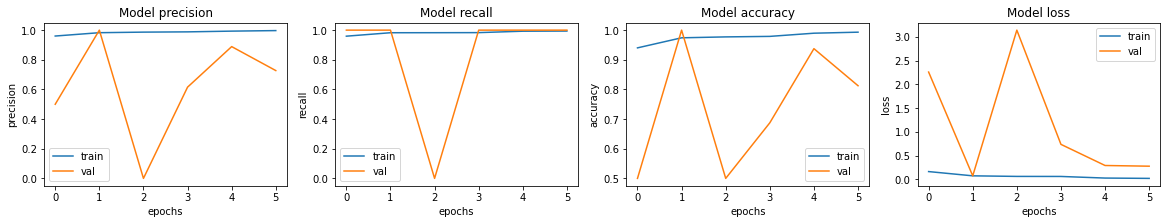

In [52]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history3.history[met])
    ax[i].plot(history3.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [53]:
metrics = ['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall']
models = [history1, history3]
model_name = ['ResNet50', 'InceptionV3']
best_model = []

for i in models:
  m = np.argmax(i.history['val_accuracy'])
  for j in metrics:
    best_model.append(i.history[j][m])

df = pd.DataFrame((np.array(best_model)).reshape(2,8), columns=metrics, index=model_name)

In [54]:
df

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
ResNet50,0.042799,0.982554,0.988132,0.988387,0.266593,0.9375,0.888889,1.0
InceptionV3,0.073635,0.974118,0.982705,0.982452,0.073316,1.0000,1.000000,1.0


In [29]:
model3.load_weights("best_weights_inception.h5")
# Save the whole model (weigths + architecture)
model3.save("model.h5")

In [30]:
loaded_model = tf.keras.models.load_model("model.h5")

In [31]:
test_image = [load_and_transform(i) for i in test_images_path]
test_images = np.asarray(test_image)
test_labels = np.asarray(test_labels)
print(test_images.shape)
print(test_labels.shape)

(624, 224, 224, 3)
(624,)


NORMAL


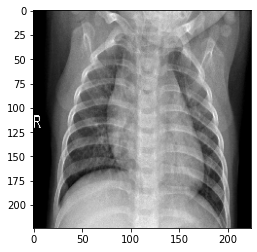

In [32]:
print(INV_LABELS[test_labels[190]])
plt.imshow(test_images[190].reshape(224 , 224 , 3))

In [33]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your pre-trained model
model3 = load_model("model.h5")

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_pneumonia(img_array):
    predictions = model3.predict(img_array)
    return predictions[0, 0]

def main():
    st.title("Pneumonia Detection with X-ray Images")
    st.text("Upload an X-ray image to check for pneumonia")

    # Upload image through Streamlit
    uploaded_file = st.file_uploader("Choose an X-ray image...", type="jpg")

    if uploaded_file is not None:
        # Display the uploaded image
        st.image(uploaded_file, caption="Uploaded X-ray Image.", use_column_width=True)

        # Preprocess the image
        img_array = preprocess_image(uploaded_file)

        # Make predictions
        prediction = predict_pneumonia(img_array)

        # Display the prediction
        st.subheader("Prediction:")
        if prediction > 0.5:
            st.write("The model predicts pneumonia.")
        else:
            st.write("The model predicts no pneumonia.")

if __name__ == "__main__":
    main()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\MingW2\pyth\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ihamz\AppData\Local\Temp\ipykernel_15768\1160431055.py", line 1, in <cell line: 1>
    import streamlit as st
  File "C:\MingW2\pyth\lib\site-packages\streamlit\__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "C:\MingW2\pyth\lib\site-packages\streamlit\delta_generator.py", line 36, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "C:\MingW2\pyth\lib\site-packages\streamlit\cursor.py", line 18, in <module>
    from streamlit.runtime.scriptrunner import get_script_run_ctx
  File "C:\MingW2\pyth\lib\site-packages\streamlit\runtime\__init__.py", line 16, in <module>
    from streamlit.runtime.runtime import Runtime as Runtime
  File "C:\MingW2\pyth\lib\site-packages